# Procedures
1. Gaussian Filter
1. Threshholding
1. Enhance Contrast
    1. Histogram Equalization
    2. Adaptive Histogram Equalization(adaptive)
    3. Contrast Limited Adaptive Histogram Equalization(limited adaptive) (CLAHE)
1. Noise Reduction
1. HOG
1. LBP
1. Algorithms
    1. SVM
    2. CNN
    3. VGG-16
    4. RESNET
1. Evealuation
    1. Classification Accuracy
    2. Logarithmic Loss
    3. Confussion Matrix
    4. Area Under Curve
    5. F1 Score
    6. Mean Absolute Error
    7. Mean Square Error

### Necessary Imports

In [10]:
from pathlib import Path
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import exposure
from skimage.filters import gaussian
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

### Necessary Functions

In [11]:
rgb2gray = lambda original: color.rgb2gray(original)
rgb = lambda original: color.gray2rgb(original)
read = lambda path: plt.imread(path)
img_red = lambda img: img[:, :, 0]
img_green = lambda img: img[:, :, 1]
img_blue = lambda img: img[:, :, 2]
size = lambda img: img.size
shape = lambda img: img.shape
img_flp_v = lambda img: np.flipud(img)
img_flip_h = lambda img: np.fliplr(img)
gaussian_filtr = lambda img: gaussian(img, multichannel=True)
img_hist_eq = lambda img: exposure.equalize_hist(img)
img_clahe = lambda img: exposure.equalize_adapthist(img, clip_limit=0.03)
img_denoise_tv = lambda img: denoise_tv_chambolle(img, multichannel=True)
img_denoise_bilateral = lambda img: denoise_bilateral(img, multichannel=True)
def show_img(img, title='Image', cmap_types='rgb'):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
def show_hist(img, color='all', bins=256):
    def show(arr, title):
        plt.hist(arr, bins=bins)
        plt.title(title)
        plt.show()
    if color == 'all':
        plt.subplot(2, 2, 1)
        show(img_red(img).flatten(), 'red channel')
        plt.subplot(2, 2, 2)
        show(img_green(img).flatten(), 'green channel')
        plt.subplot(2, 2, 3)
        show(img_blue(img).flatten(), 'blue channel')
    if color == 'r':
        show(img_red(img).flatten(), 'red channel')
    if color == 'g':
        show(img_green(img).flatten(), 'green channel')
    if color == 'b':
        show(img_blue(img).flatten(), 'blue channel')
def compare_img(original, img2, scnd_img_title, cmap='rgb'):
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap=cmap)
    plt.title('original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=cmap)
    plt.title(scnd_img_title)
    plt.axis('off')
    plt.xlabel('comparing original and other image')
    plt.show()
def load_img():
    dataset_path = join(Path('__file__').parent.absolute(), 'skin diseases/Dataset/test/Acne and Rosacea Photos')
    for img in listdir(dataset_path):
        img_path = join(dataset_path, img)
        if isfile(img_path): yield read(img_path)
        else: print('!ok')

### Feature Extraction Algorithms

### Classification Algorithms

### Evealuation Techniques

### Working Pipeline

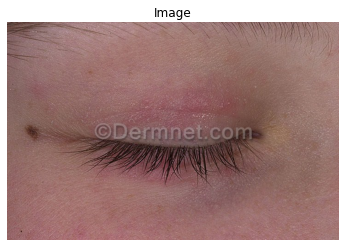

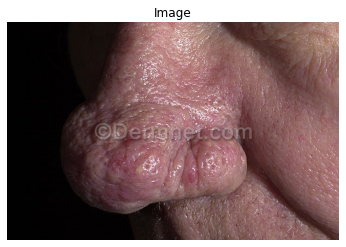

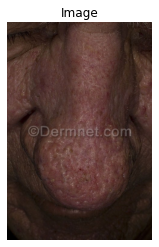

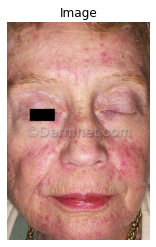

In [12]:
count = 0
for img in load_img():
    show_img(img)
    count+=1
    if count == 4: break